<a href="https://www.kaggle.com/code/karinasaunders/a-man-called-ove-goodreads-reviews?scriptVersionId=121145180" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# download packages 

import numpy as np # linear algebra
import pandas as pd # data processing
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://www.goodreads.com/book/show/18774964-a-man-called-ove/reviews'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
reviews = []
for row in soup.find_all(class_ = 'ReviewCard'):
    rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
    review_text = row.find(class_ = 'ReviewText').text.strip()
    date = row.find(class_ ='Text Text__body3').text
    username = row.find(class_ = 'ReviewerProfile__name').text.strip()
    likes = row.find(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
    book = {
        "Text": review_text,
        "Rating": rating,
        "Date" : date,
        "Username": username,
        "Likes": likes
    }
    reviews.append(book)

In [4]:
ove_df = pd.DataFrame(reviews)

ove_df['Rating'] = ove_df['Rating'].str[7]
ove_df['Review Likes'] = ove_df['Likes'].str.rstrip(' likes')
ove_df = ove_df.drop(columns='Likes')

In [5]:
display(ove_df)

,Text,Rating,Date,Username,Review Likes
0,Update: I had planned to leave this post as it...,4,"October 1, 2016",Emily May,"3,538"
1,"""Death is a strange thing. People live their w...",5,"January 23, 2015",Lynda,"1,933"
2,Argh! It’s hard not to start this review with ...,2,"June 18, 2016",Debbie,962
3,Shout out to this absolutely fabulous book in ...,5,"December 9, 2020",Miranda Reads,706
4,"When I finished reading this book, I closed it...",5,"January 11, 2023",chai ♡,"2,622"
5,Received as an ARC from the publisher. Started...,5,"May 11, 2014",David V.,"1,656"
6,This is a tale that makes you appreciate life!...,5,"October 23, 2019",Elyse Walters,634
7,"This novel, set in Sweden, tells the story of ...",5,"July 28, 2017",Nicholas Sparks,752
8,The One Who Does Not Read Books sat down and l...,5,"February 12, 2023",Lisa of Troy,557
9,Fredrik Backman is one of my favorite authors ...,5,"October 15, 2022",Nilufer Ozmekik,511


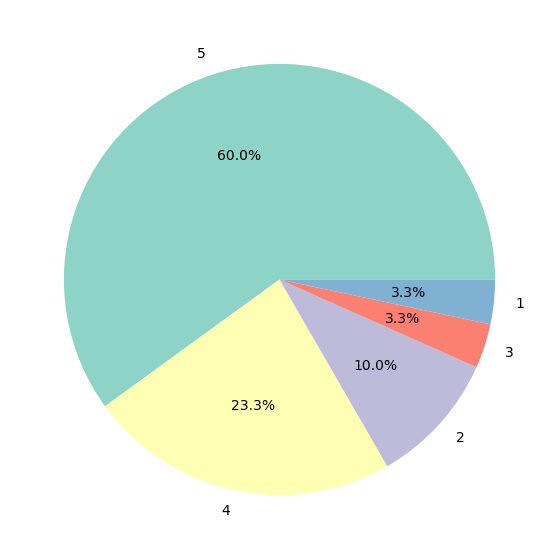

In [6]:
# Creating plot of ratings

data = ove_df['Rating'].value_counts()
labels = ove_df['Rating'].value_counts().keys()

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels, autopct="%1.1f%%", colors=sns.color_palette("Set3"))
 
# show plot
plt.show()

In [7]:
import time

# define a new function to get single page data
def singe_page(d):
    row = d.find_all(class_ = 'ReviewCard')
    # get the value of 'name', 'date', 'review', 'like'
    name = row.find_all(class_ = 'ReviewerProfile__name').text.strip()
    date = row.find_all(class_ ='Text Text__body3').text
    review = row.find_all(class_ = 'ReviewText').text.strip()
    like = row.find_all(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
    
    # get the value of 'rating', [progressing NA value]
    rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
    #rating = []
    #for i in range(len(review_state)):
    #    if 'rated it' in review_state[i].get_text():
    #        rate_i = review_state[i].find_all('span', class_='staticStars notranslate')[0].get_text()
    #        rating.append(rate_i)
    #    else:
    #        rating.append(None)
    
    # extract text from data
    name = list(map(lambda x: x.get_text(), name))
    date = list(map(lambda x: x.get_text(), date))
    review = list(map(lambda x: x.get_text(), review))
    like = list(map(lambda x: x.get_text(), like))
    
    # define a dataframe of different variables
    reviews = pd.DataFrame({'name':name, 'rating':rating, 'date':date, 'review':review, 'like':like})
    
    # clean data
    #reviews.like = reviews['like'].str.extract('(\d+)')
    #reviews['review'] = reviews['review'].apply(lambda x:x.replace('\n', ''))
    
    return reviews

In [8]:
def scrape(soup):
    reviews = []
    for row in soup.find_all(class_ = 'ReviewCard'):
        rating = row.find(class_ ='ShelfStatus').span['aria-label'].strip()
        review_text = row.find(class_ = 'ReviewText').text.strip()
        date = row.find(class_ ='Text Text__body3').text
        username = row.find(class_ = 'ReviewerProfile__name').text.strip()
        likes = row.find(class_ = "Button Button--inline Button--small Button--subdued").text.strip()
        book = {
        "Text": review_text,
        "Rating": rating,
        "Date" : date,
        "Username": username,
        "Likes": likes}
        reviews.append(book)
    return reviews

In [9]:
# transformers 

from transformers import pipeline

**Sentiment Analysis**

Sentiment Analysis is used to classify whether the topic of a piece of text is negative or positive

In [10]:
text = ove_df.Text[16]

In [11]:
classifier = pipeline('sentiment-analysis')
outputs = classifier(text)
pd.DataFrame.from_records(outputs)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,label,score
0,POSITIVE,0.935445


**Named Entity Recognition (NEW)**

NER is the process of extracting named entities (names of products/places/people) from the text.

In [12]:
ner_tagger = pipeline("ner", aggregation_strategy = "simple")
outputs = ner_tagger(text)
pd.DataFrame.from_records(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,entity_group,score,word,start,end
0,MISC,0.964984,A Man Called,21,33
1,PER,0.932222,Ove,34,37
2,MISC,0.626963,Oves,313,317
3,PER,0.990989,Ove,370,373
4,PER,0.991684,Sonja,410,415
5,PER,0.990127,Ove,451,454
6,PER,0.988179,Ove,653,656
7,PER,0.998416,Jimmy,962,967
8,PER,0.997620,Jimmy,969,974
9,PER,0.997542,Fredrik Backman,1298,1313


ORG = Organiation
LOC = Location
Per = Person
MISC = Miscellaneous

The scores tell us how confident the model was about the entity.